In [1]:
#Hayder Aziz, machine medicine analysis of left and right hand movemement to track parkinson disease progression
#each hand's data set has a nested list with 3 figures (x, y, confidence score). each reading has 21 nested lists. The values 
#in this data set are 2D only as there's no z axis reading. There are a total of 900 readings for each hand. 

#need to check for speed, amplitude of movement, hesitation, halts and decrementing amplitude
# for each reading come up with a figure for the above and compare over the time series for 900 figures.


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
%matplotlib inline

In [187]:
#importing the left and right hand json data into pandas data frames
left_hand_data = pd.DataFrame(pd.read_json('hand_left_keypoints.json', typ='frame'))
right_hand_data = pd.DataFrame(pd.read_json('hand_right_keypoints.json', typ='frame'))

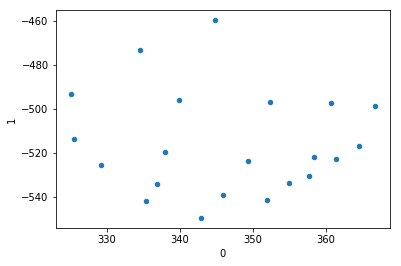

In [242]:
left_hand_data[0:1].unstack().apply(pd.Series).plot(kind='scatter',x=0,y=1)

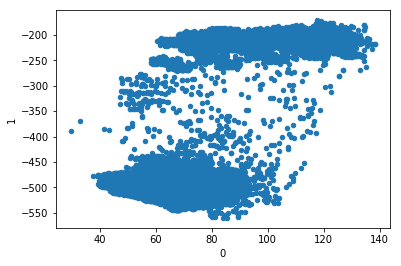

In [232]:
right_hand_data[0:899].unstack().apply(pd.Series).plot(kind='scatter',x=0,y=1)

In [190]:
left_hand_data[0].iloc[1] #an example of a left hand data set, there are 21 records per reading. 

[345.054, -464.867, 0.356979]

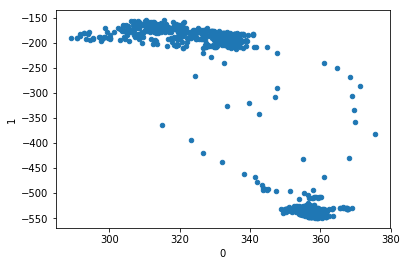

In [208]:
df_lists = left_hand_data[[20]].unstack().apply(pd.Series)
df_lists.plot(kind='scatter', x=0, y=1)

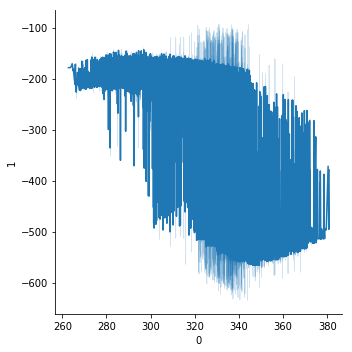

In [255]:
d1=left_hand_data[0:899].unstack().apply(pd.Series)
sns.relplot(x=0, y=1, kind="line", ci="sd", data=d1);

In [ ]:
sns.catplot(x=0, y=1, hue=2, kind="bar", data=d1);